### SHOR CODE

In [26]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import *
from qiskit.providers.aer import noise
# Loading your IBM Q account(s)
IBMQ.load_accounts()
IBMQ.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>]

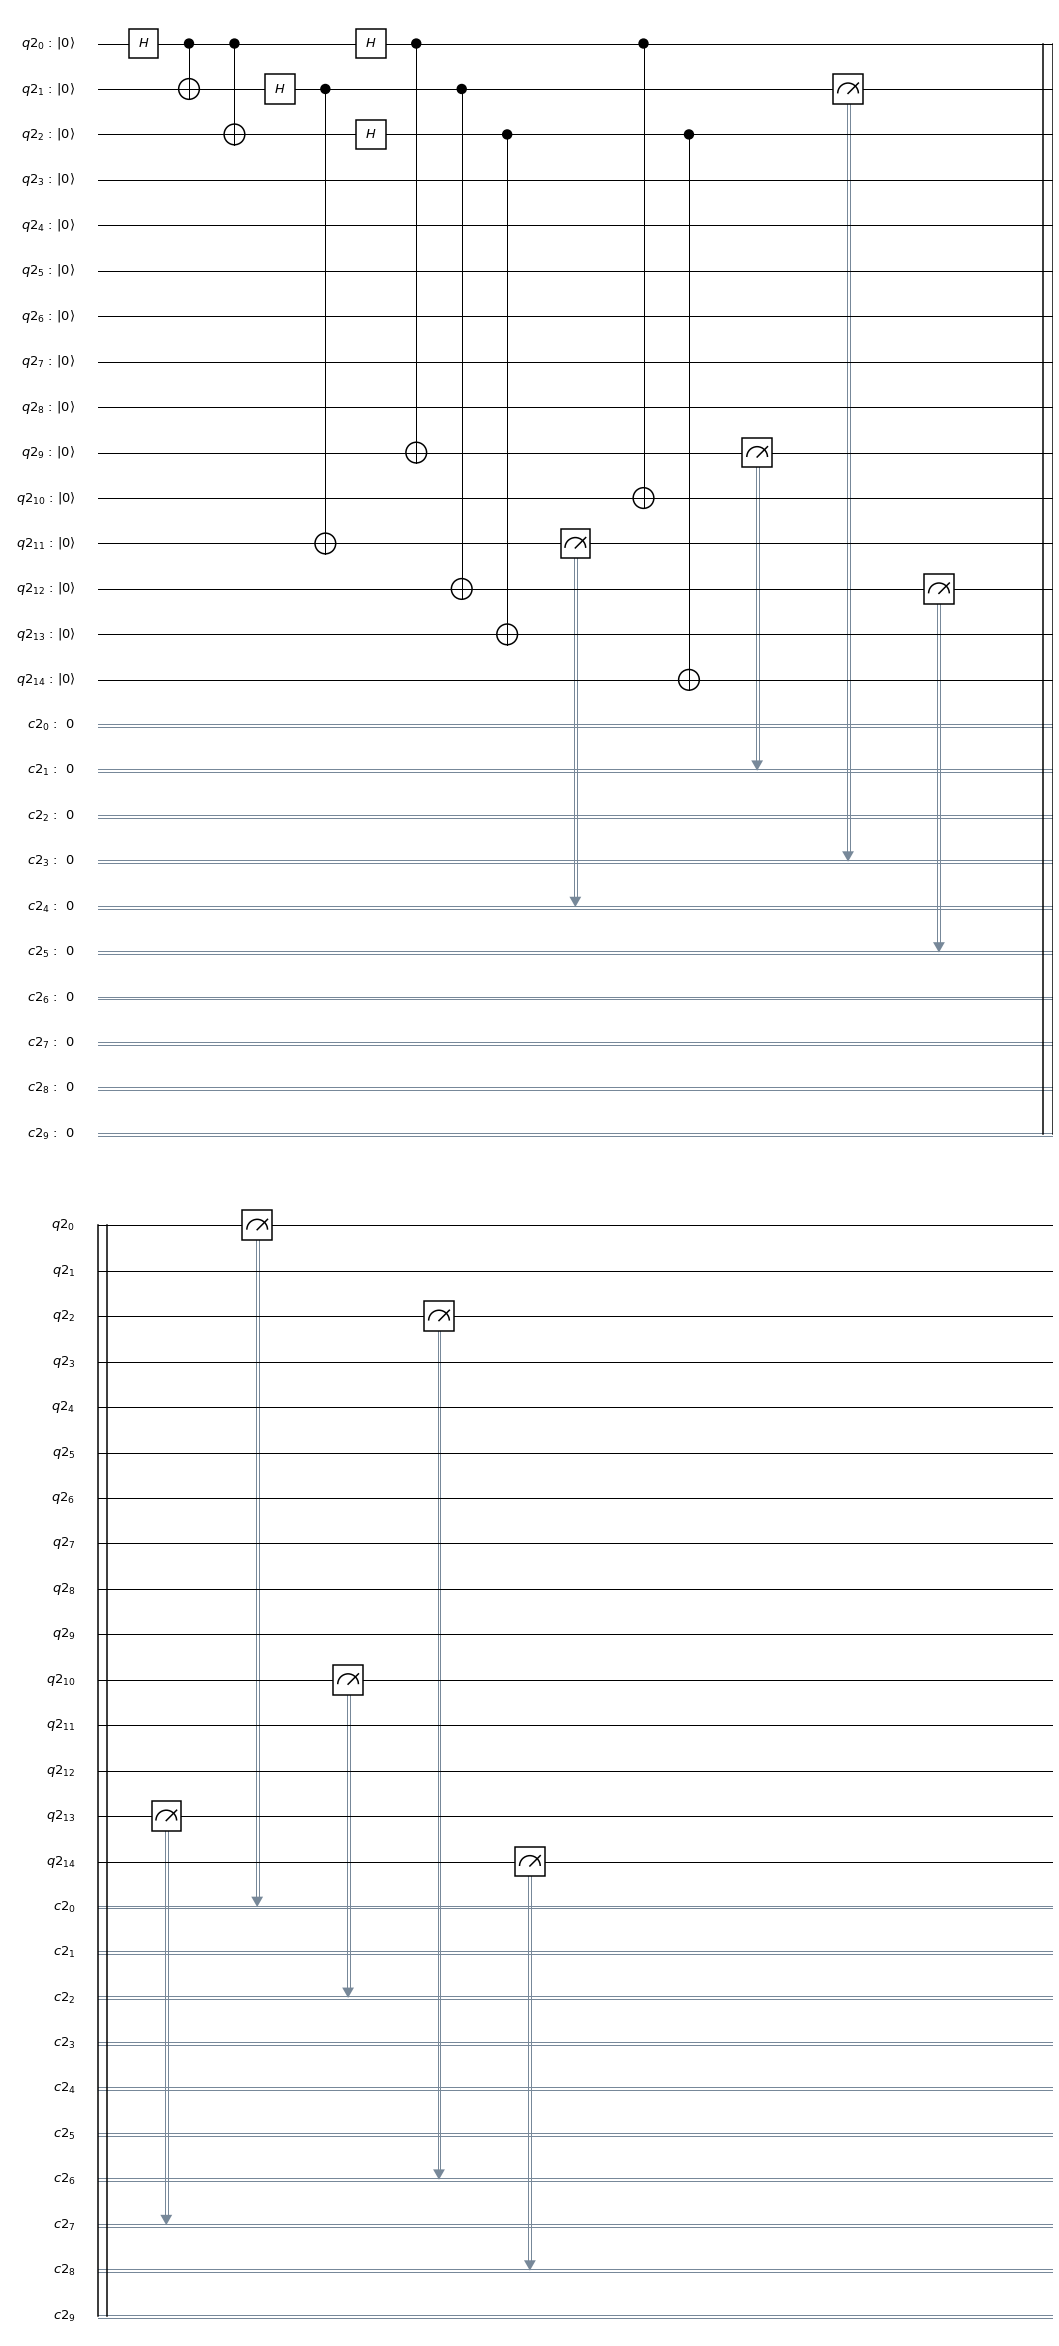

In [16]:
#encoding
q = QuantumRegister(15)
c = ClassicalRegister(10)
shor = QuantumCircuit(q,c)
shor.h(q[0])
shor.cx(q[0],q[1])
shor.cx(q[0],q[2])
shor.h(q[0])
shor.h(q[1])
shor.h(q[2])
shor.cx(q[0],q[9])
shor.cx(q[0],q[10])
shor.cx(q[1],q[11])
shor.cx(q[1],q[12])
shor.cx(q[2],q[13])
shor.cx(q[2],q[14])
shor.measure(q[0],c[0])
shor.measure(q[9],c[1])
shor.measure(q[10],c[2])
shor.measure(q[1],c[3])
shor.measure(q[11],c[4])
shor.measure(q[12],c[5])
shor.measure(q[2],c[6])
shor.measure(q[13],c[7])
shor.measure(q[14],c[8])
shor.draw()

{'0000111111': 242, '0111111000': 256, '0111000111': 267, '0000000000': 259}


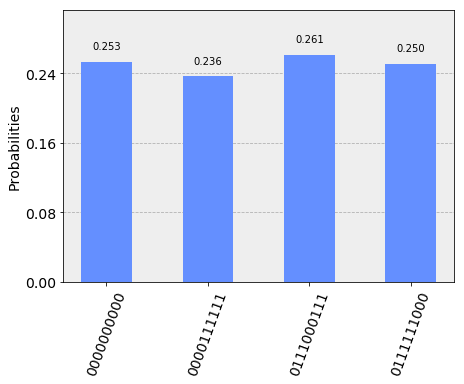

In [17]:
backend = Aer.get_backend('qasm_simulator')
job = execute(shor,backend,shots=1024)
output = job.result()
outputMeasure = output.get_counts()
print(outputMeasure)
plot_histogram(outputMeasure)

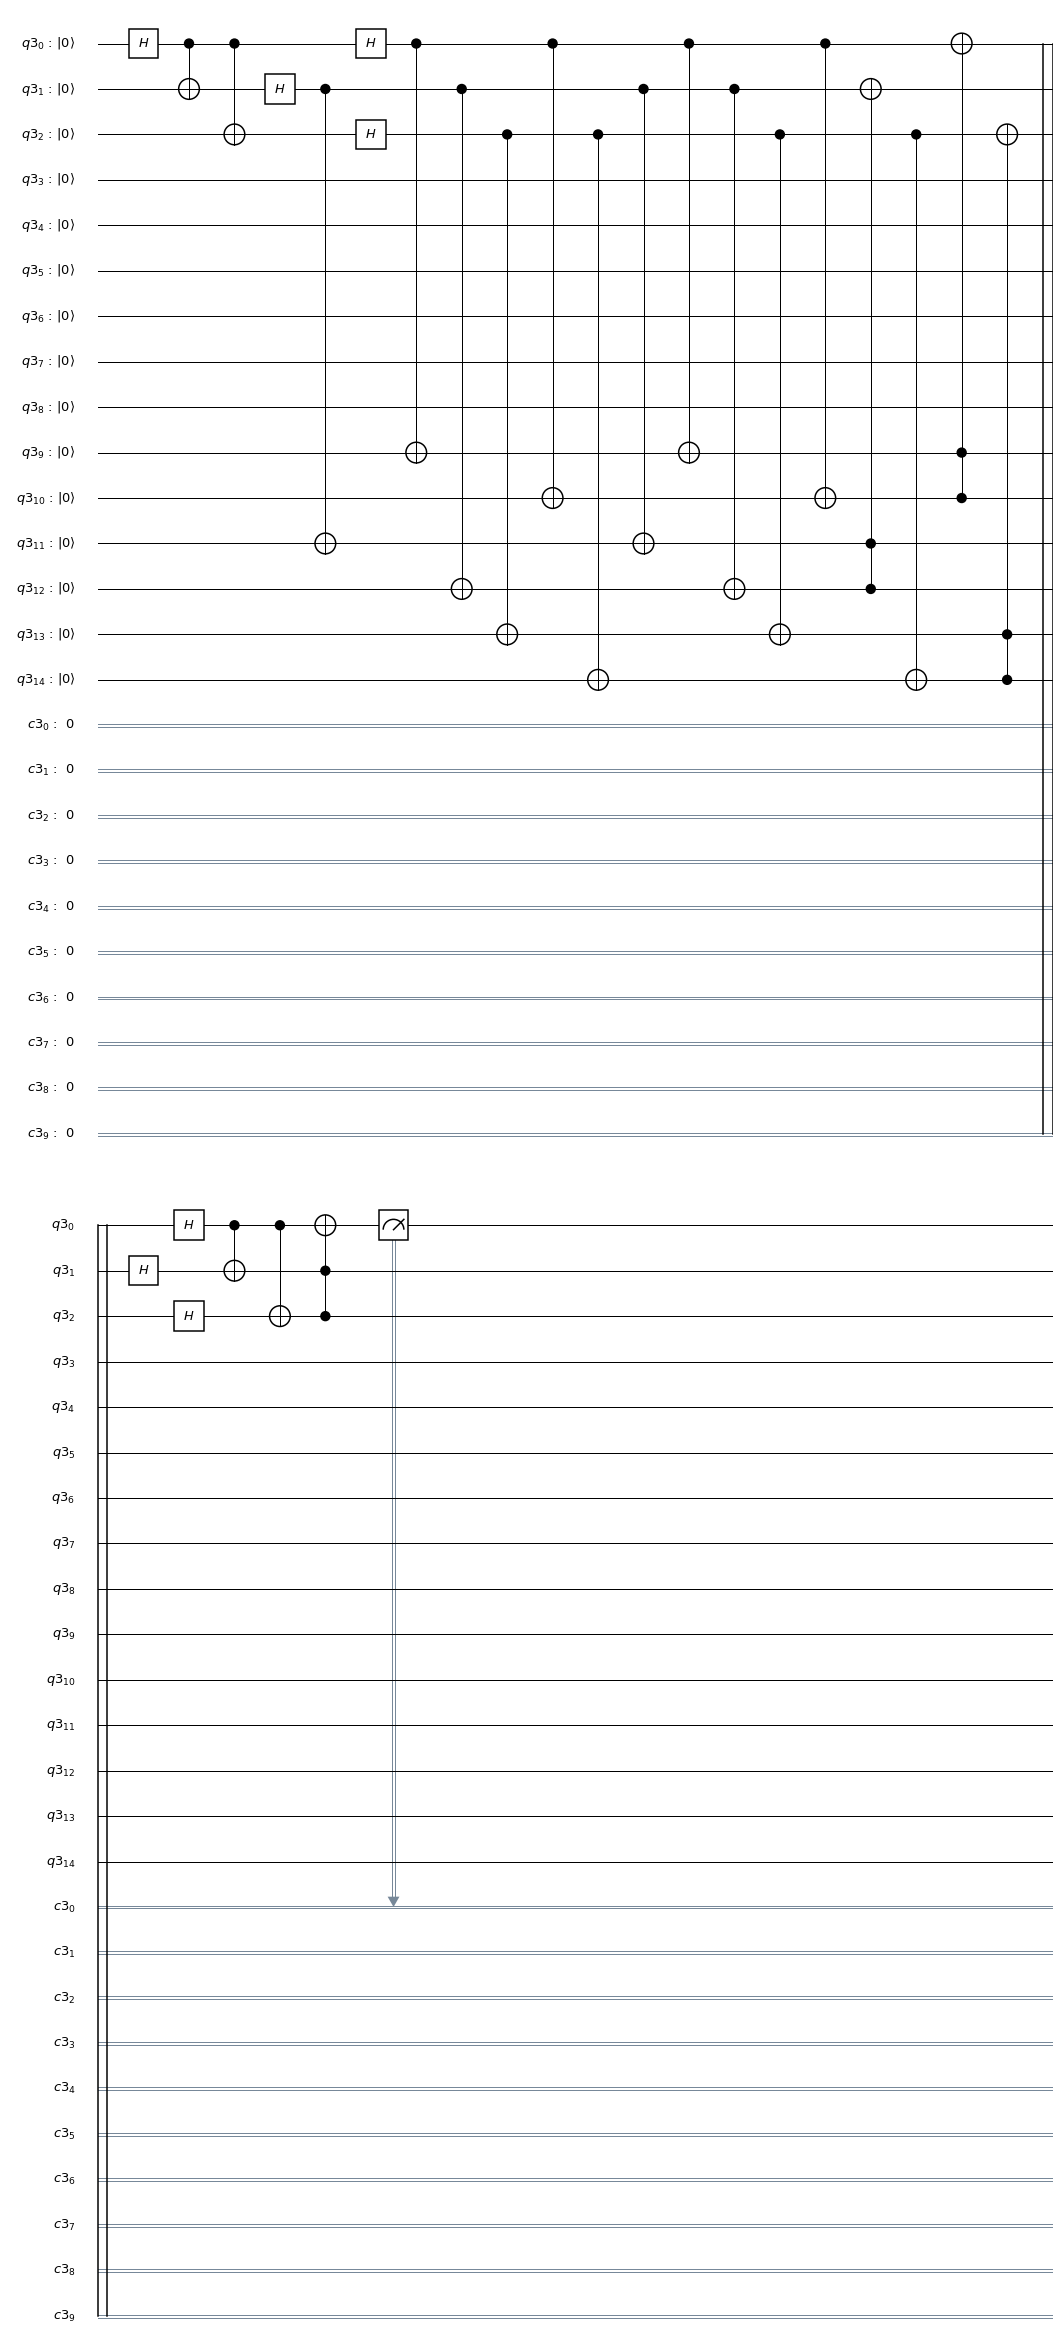

In [18]:
#decode
q = QuantumRegister(15)
c = ClassicalRegister(10)
shor = QuantumCircuit(q,c)
shor.h(q[0])
shor.cx(q[0],q[1])
shor.cx(q[0],q[2])
shor.h(q[0])
shor.h(q[1])
shor.h(q[2])
shor.cx(q[0],q[9])
shor.cx(q[0],q[10])
shor.cx(q[1],q[11])
shor.cx(q[1],q[12])
shor.cx(q[2],q[13])
shor.cx(q[2],q[14])
shor.cx(q[0],q[9])
shor.cx(q[0],q[10])
shor.ccx(q[10],q[9],q[0])
shor.h(q[0])
shor.cx(q[1],q[11])
shor.cx(q[1],q[12])
shor.ccx(q[12],q[11],q[1])
shor.h(q[1])
shor.cx(q[2],q[13])
shor.cx(q[2],q[14])
shor.ccx(q[14],q[13],q[2])
shor.h(q[2])
shor.cx(q[0],q[1])
shor.cx(q[0],q[2])
shor.ccx(q[2],q[1],q[0])
shor.measure(q[0],c[0])
shor.draw()


{'0000000000': 546, '0000000001': 478}


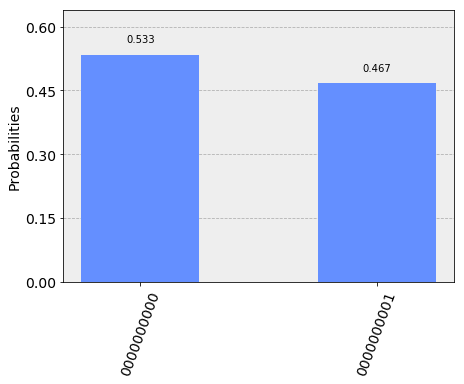

In [29]:
backend = Aer.get_backend('qasm_simulator')
job = execute(shor, backend,shots=1024)
output = job.result()
outputMeasure = output.get_counts()
print(outputMeasure)
plot_histogram(outputMeasure)
